In [1]:
import csv
import matplotlib.pyplot as plt
import docx
import tkinter as tk

In [19]:
with open('D:\\Курсовая работа\\магазин.csv', 'r', encoding="utf-8") as file: 
    total_revenue = 0
    reader = csv.reader(file, delimiter=';')
    next(reader)
    for row in reader:
        if len(row) <= 7:
            total_revenue += int(row[6])

print("Общая выручка магазина:", total_revenue)

Общая выручка магазина: 838058


Максимальное количество продаж: 250 

Наименования товаров с максимальным количеством продаж:
Яйцо C0




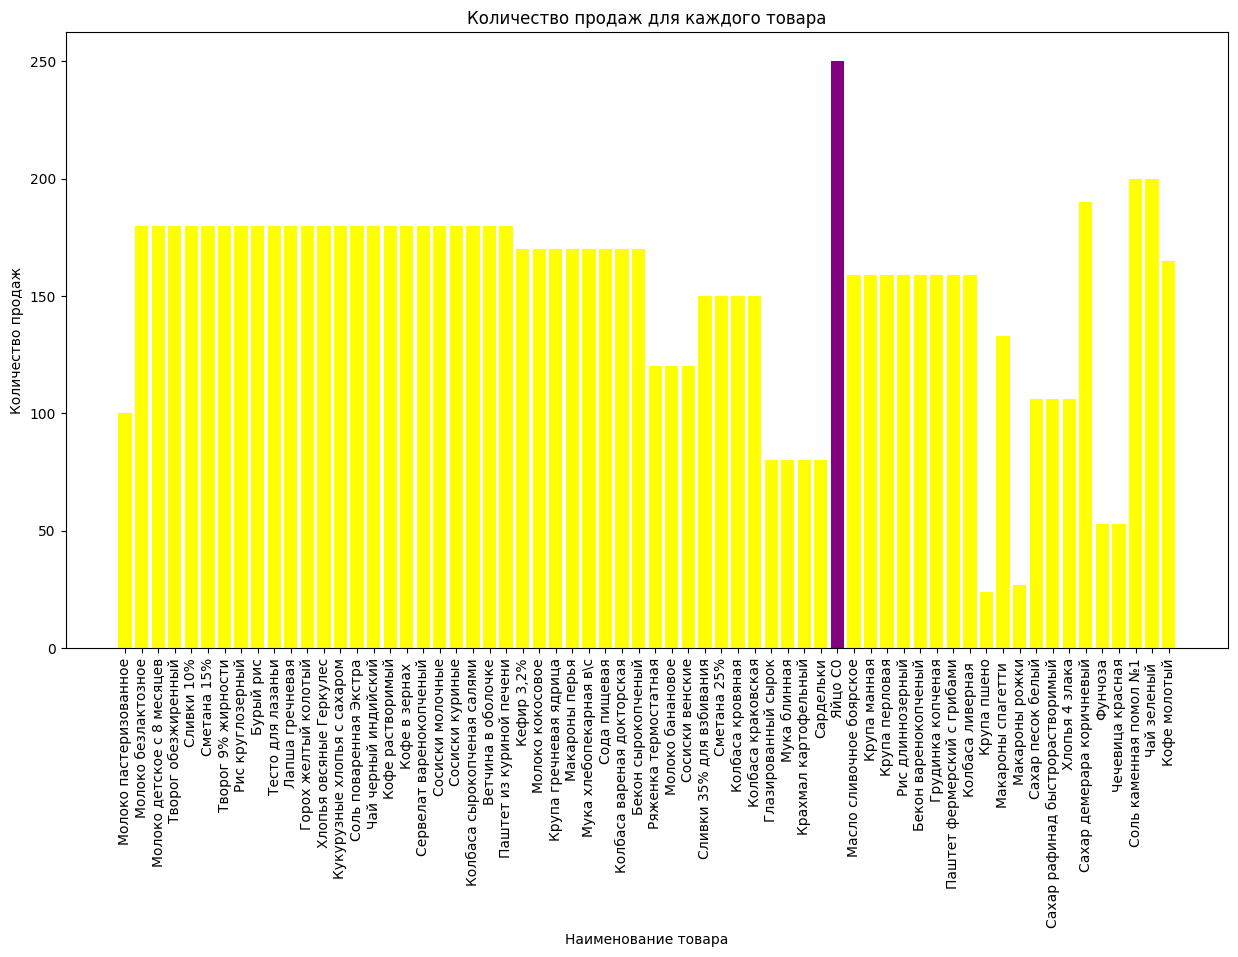

In [18]:
# открытие файла с данными
with open('D:\\Курсовая работа\\магазин.csv', 'r', encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)
    hash_table = {}
    for row in reader:
        product_name = row[2]  # название товара в третьем столбце
        sales_count = int(row[4])  # количество продаж в пятом столбце

        # добавление товара в хеш-таблицу
        if sales_count in hash_table:
            hash_table[sales_count].append(product_name)
        else:
            hash_table[sales_count] = [product_name]

    max_sales = max(hash_table.keys())
    products_with_max_sales = hash_table[max_sales]

    print("Максимальное количество продаж:", max_sales, "\n")
    print("Наименования товаров с максимальным количеством продаж:")
    for product in products_with_max_sales:
        print(product)
    print("\n")

    # создание графика
    products = []
    sales_counts = []
    for sales_count, product_list in hash_table.items():
        for product in product_list:
            products.append(product)
            sales_counts.append(sales_count)

    # выделение максимального товара другим цветом
    colors = ['yellow' if count != max_sales else 'purple' for count in sales_counts]

    plt.figure(figsize=(15, 8))  # увеличение размеров графика
    plt.bar(products, sales_counts, color=colors)
    plt.xlabel('Наименование товара')
    plt.ylabel('Количество продаж')
    plt.title('Количество продаж для каждого товара')
    plt.xticks(rotation=90)  # поворот меток оси x для лучшей видимости
    plt.show()


In [16]:
with open('D:\\Курсовая работа\\магазин.csv', 'r', encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)
    stack_total_cost = []                                       #создание стека с общей стоимостью товаров
    stack_name_product = []                                     #создание стека с названиями товаров
    for row in reader:
        if len(row) <= 7:
            value_cost = int(row[6])
            stack_total_cost.append(value_cost)                 
            value_name = str(row[2])
            stack_name_product.append(value_name)               #заполнение обоих стеков

    max_total_cost = stack_total_cost[0]
    id = 0

    for i in range(len(stack_total_cost)):
        if stack_total_cost[i] > max_total_cost:
            max_total_cost = stack_total_cost[i]
            id = i                                              #нашли товар принесший наибольшую выручку, а также его id в обоих стеках

print(" Товар(ы) принесший(-е) наибольшую выручку:\n", stack_name_product[id],"-", stack_total_cost[id])

 Товар(ы) принесший(-е) наибольшую выручку:
 Соль каменная помол №1 - 74000


Доля каждого товара в общей выручке

Молоко пастеризованное - 7500 ( 0.89 % )
Молоко безлактозное - 13500 ( 1.61 % )
Молоко детское с 8 месяцев - 12600 ( 1.5 % )
Кефир 3,2% - 11900 ( 1.42 % )
Творог обезжиренный - 9000 ( 1.07 % )
Ряженка термостатная - 6000 ( 0.72 % )
Сливки 10% - 9900 ( 1.18 % )
Сливки 35% для взбивания - 8250 ( 0.98 % )
Сметана 15% - 12600 ( 1.5 % )
Сметана 25% - 10500 ( 1.25 % )
Молоко кокосовое - 10200 ( 1.22 % )
Молоко банановое - 7200 ( 0.86 % )
Творог 9% жирности - 8820 ( 1.05 % )
Глазированный сырок - 3920 ( 0.47 % )
Яйцо C0 - 12500 ( 1.49 % )
Масло сливочное боярское - 7950 ( 0.95 % )
Крупа гречневая ядрица - 8840 ( 1.05 % )
Крупа манная - 8268 ( 0.99 % )
Крупа пшено - 1128 ( 0.13 % )
Крупа перловая - 7473 ( 0.89 % )
Рис круглозерный - 8100 ( 0.97 % )
Рис длиннозерный - 7155 ( 0.85 % )
Бурый рис - 6840 ( 0.82 % )
Макароны спагетти  - 5054 ( 0.6 % )
Тесто для лазаньи - 15300 ( 1.83 % )
Макароны рожки - 2295 ( 0.27 % )
Макароны перья - 7480 ( 0.89 % )
Сахар песо

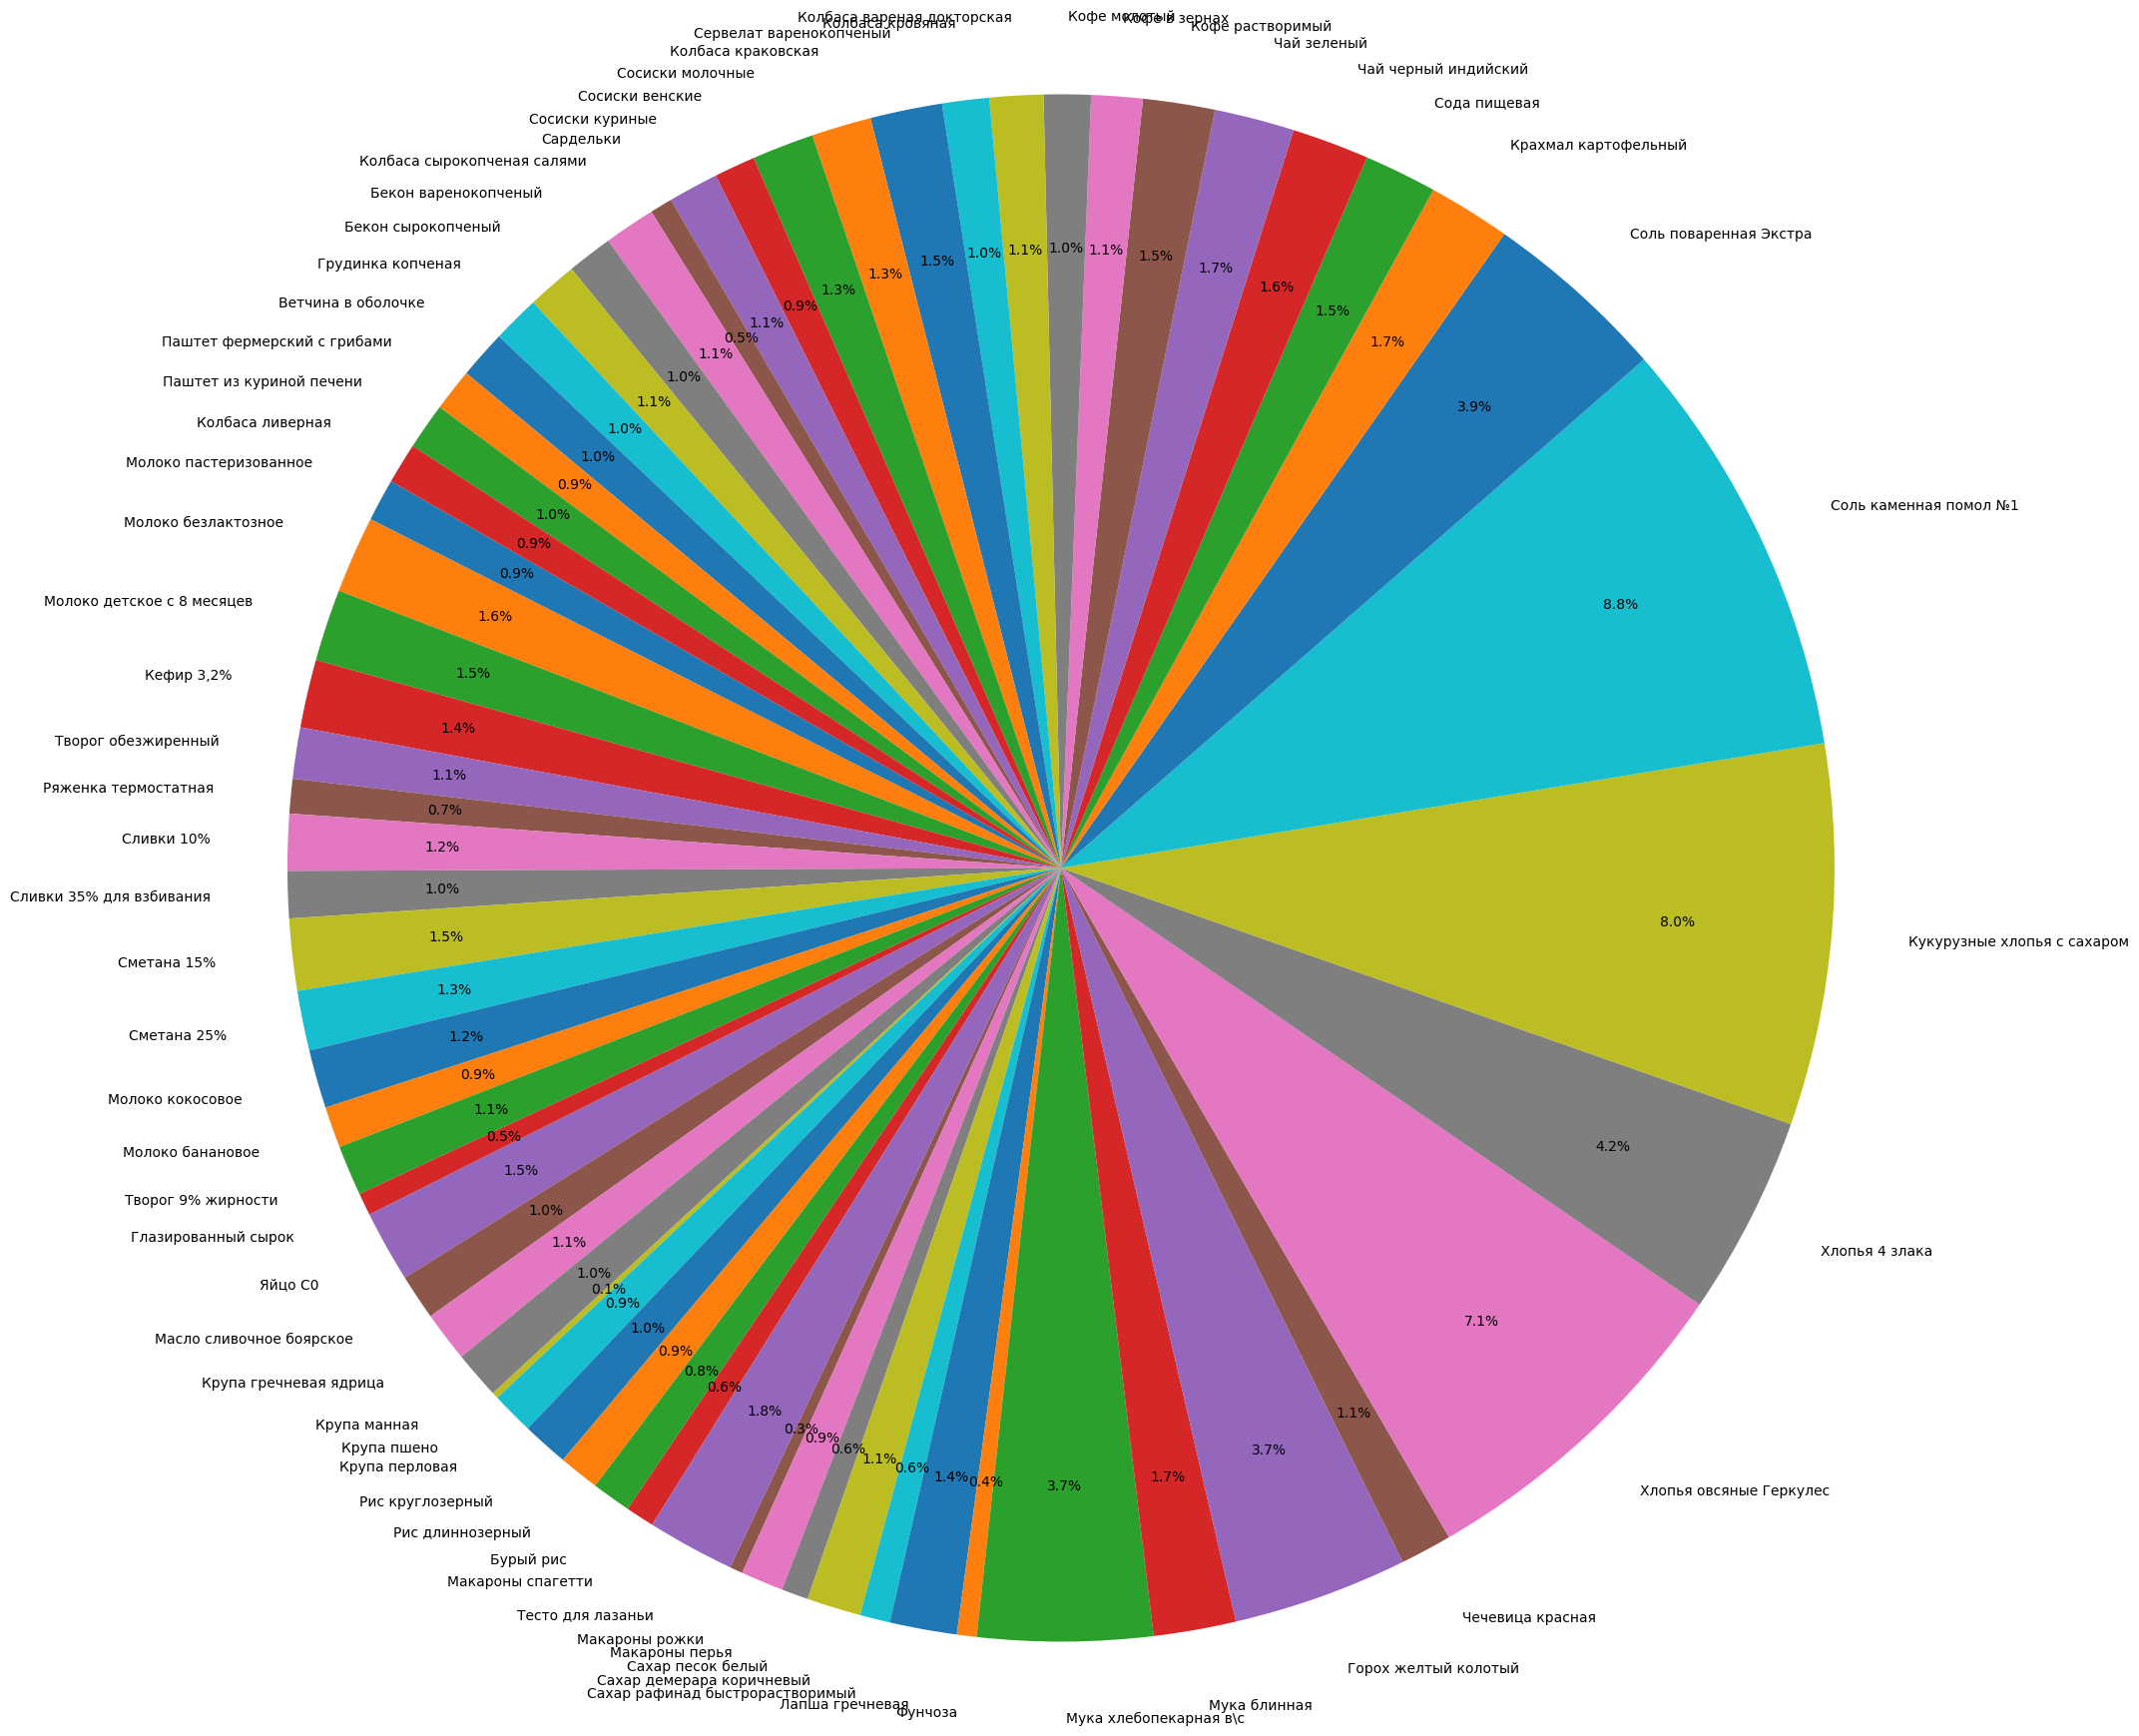

In [20]:
#total_revenue - общая выручка
#stack_total_cost - стек с общей стоимостью товаров
#stack_name_product - стек с названиями товаров

array = []

for i in range(len(stack_name_product)):
    row = []
    percent = round(stack_total_cost[i] * 100 / total_revenue, 2)
    row.append(stack_name_product[i])
    row.append(stack_total_cost[i])
    row.append(percent)
    array.append(row)

print("Доля каждого товара в общей выручке\n")

for row in array:
    print(row[0], "-", row[1], "(", row[2], "% )")

labels = [row[0] for row in array]
# Доли товаров в процентах
sizes = [row[2] for row in array]

plt.figure(figsize=(22, 22))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=150, pctdistance=0.8)  # Увеличение расстояния для процентных значений
plt.axis('equal')



plt.show()

In [23]:
with open('D:\\Курсовая работа\\магазин.csv', 'r', encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)
    hash_table = {}
    global_sales_count = []
    print("Количество проданных единиц каждого товара\n")
    for row in reader:
        product_name = row[2]
        sales_count = int(row[4])
        global_sales_count.append(sales_count)
        print(product_name, "-", sales_count)

Количество проданных единиц каждого товара

Молоко пастеризованное - 100
Молоко безлактозное - 180
Молоко детское с 8 месяцев - 180
Кефир 3,2% - 170
Творог обезжиренный - 180
Ряженка термостатная - 120
Сливки 10% - 180
Сливки 35% для взбивания - 150
Сметана 15% - 180
Сметана 25% - 150
Молоко кокосовое - 170
Молоко банановое - 120
Творог 9% жирности - 180
Глазированный сырок - 80
Яйцо C0 - 250
Масло сливочное боярское - 159
Крупа гречневая ядрица - 170
Крупа манная - 159
Крупа пшено - 24
Крупа перловая - 159
Рис круглозерный - 180
Рис длиннозерный - 159
Бурый рис - 180
Макароны спагетти  - 133
Тесто для лазаньи - 180
Макароны рожки - 27
Макароны перья - 170
Сахар песок белый - 106
Сахар демерара коричневый - 190
Сахар рафинад быстрорастворимый - 106
Лапша гречневая - 180
Фунчоза - 53
Мука хлебопекарная в\с - 170
Мука блинная - 80
Горох желтый колотый - 180
Чечевица красная - 53
Хлопья овсяные Геркулес - 180
Хлопья 4 злака - 106
Кукурузные хлопья с сахаром - 180
Соль каменная помол №1 - 

In [31]:
import docx

# Создание нового документа
doc = docx.Document()

# Добавление заголовка
doc.add_heading('Доля каждого товара в общей выручке', level=1)

i = 0

for row in array:
    doc.add_paragraph(f"{row[0]} - {row[1]}руб {global_sales_count[i]}шт  ({row[2]}%)")
    i += 1

# Добавление общей выручки
doc.add_paragraph(f"({total_revenue}руб)")

# Сохранение файла
file_path = 'D:\\Курсовая работа\\output.docx'
doc.save(file_path)

# Открытие файла
import os
os.startfile(file_path)


In [32]:
import csv
import tkinter as tk
from tkinter import ttk
from docx import Document
import os

# Функция для чтения CSV-файла и отображения количества продаж для каждого товара
def display_sales_count():
    with open('D:\\Курсовая работа\\магазин.csv', 'r', encoding="utf-8") as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)
        sales_info = "Количество проданных единиц каждого товара\n\n"
        for row in reader:
            product_name = row[2]
            sales_count = int(row[4])
            sales_info += f"{product_name} - {sales_count}\n"
        sales_text.config(state=tk.NORMAL)  # Включить редактирование текстового виджета
        sales_text.delete('1.0', tk.END)  # Очистить существующий текст
        sales_text.insert(tk.END, sales_info)  # Вставить обновленную информацию о продажах
        sales_text.config(state=tk.DISABLED)  # Отключить редактирование текстового виджета

# Функция для очистки отображаемого количества продаж
def clear_sales_count():
    sales_text.config(state=tk.NORMAL)  # Включить редактирование текстового виджета
    sales_text.delete('1.0', tk.END)  # Очистить существующий текст
    sales_text.config(state=tk.DISABLED)  # Отключить редактирование текстового виджета

# Новая функция для создания массива и вывода доли каждого товара в общей выручке
def calculate_product_share():
    array = []
    for i in range(len(stack_name_product)):
        row = []
        percent = round(stack_total_cost[i] * 100 / total_revenue, 2)
        row.append(stack_name_product[i])
        row.append(stack_total_cost[i])
        row.append(percent)
        array.append(row)

    sales_info = "Доля каждого товара в общей выручке\n\n"
    for row in array:
        sales_info += f"{row[0]} - {row[1]} ({row[2]}%)\n"

    sales_text.config(state=tk.NORMAL)  # Включить редактирование текстового виджета
    sales_text.delete('1.0', tk.END)  # Очистить существующий текст
    sales_text.insert(tk.END, sales_info)  # Вставить обновленную информацию о продажах
    sales_text.config(state=tk.DISABLED)  # Отключить редактирование текстового виджета

def create_word_file():
    doc = Document()
    doc.add_heading('Информация о товарах', 0)

    sales_text.config(state=tk.NORMAL)  # Включить редактирование текстового виджета
    info = sales_text.get('1.0', tk.END)  # Получить информацию из текстового виджета
    doc.add_paragraph(info)
    sales_text.config(state=tk.DISABLED)  # Отключить редактирование текстового виджета

    doc.save('sales_info.docx')  # Сохранить документ
    os.startfile('sales_info.docx')  # Открыть документ



# Создание основного окна с начальной шириной
root = tk.Tk()
root.title("Sales Count")
root.geometry("1000x800")  # Установить начальные размеры окна
root.resizable(width=False, height=False)  # Prevent window resizing

# Создание кнопки для отображения количества продаж
display_button = tk.Button(root, text="Отобразить количество продаж", command=display_sales_count)
display_button.pack(pady=10)

# Создание кнопки для очистки отображаемого количества продаж
clear_button = tk.Button(root, text="Очистить", command=clear_sales_count)
clear_button.pack(pady=10)

# Создание кнопки для вывода доли каждого товара в общей выручке
calculate_share_button = tk.Button(root, text="Рассчитать долю товаров", command=calculate_product_share)
calculate_share_button.pack(pady=10)

create_word_button = tk.Button(root, text="Создать Word файл", command=create_word_file)
create_word_button.pack(pady=10)

# Создание прокручиваемого текстового виджета для отображения количества продаж
sales_frame = ttk.Frame(root)
sales_frame.pack()
sales_scroll = tk.Scrollbar(sales_frame, orient=tk.VERTICAL)
sales_text = tk.Text(sales_frame, yscrollcommand=sales_scroll.set, state=tk.DISABLED)
sales_scroll.config(command=sales_text.yview)
sales_scroll.pack(side=tk.RIGHT, fill=tk.Y)
sales_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)



# Запуск приложения
root.mainloop()
